In [1]:
%matplotlib notebook

import psycopg2.extras
import pandas as pd
from apps.backtesting.rebalancing.backtester_portfolio import PortfolioBacktester
from apps.backtesting.utils import datetime_to_timestamp

import logging, sys
logging.disable(sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

backtester = PortfolioBacktester(start_time=int(datetime_to_timestamp('2018/10/01 00:00:00 UTC')),
                            end_time=int(datetime_to_timestamp('2018/10/30 00:00:00 UTC')),
                            step_seconds=60*60,
                            portions_dict={
                                'BTC': 1.0/3,
                                'DASH': 1.0/3,
                                'NEO': 1.0/3,
                            },
                            start_value_of_portfolio=1,
                            counter_currency='BTC')

df = backtester.value_dataframe

INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 31.33% out of 9.80G


In [2]:
pd.set_option('display.max_columns', 300)
df.head()

BTC_amount BTC_asset  BTC_portion  BTC_timestamp  BTC_unit_price  \
timestamp                                                                      
1538352000    0.333333       BTC     0.333333     1538352000               1   
1538355600    0.333753       BTC     0.333333     1538355600               1   
1538359200    0.334295       BTC     0.333333     1538359200               1   
1538362800    0.333840       BTC     0.333333     1538362800               1   
1538366400    0.333694       BTC     0.333333     1538366400               1   

            BTC_unit_price_usdt  BTC_value  BTC_value_usdt  DASH_amount  \
timestamp                                                                 
1538352000              6628.69   0.333333     2209.563333    11.784809   
1538355600              6649.98   0.333753     2219.452546    11.759329   
1538359200              6640.00   0.334295     2219.719650    11.766398   
1538362800              6643.68   0.333840     2217.927199    11.798557   
1538366400              6648.63   0.333694     2218.607681    11.784227   

           DASH_asset  DASH_portion  DASH_timestamp  DASH_unit_price  \
timestamp                                                              
1538352000       DASH      0.333333      1538352000         0.028285   
1538355600       DASH      0.333333      1538355600         0.028382   
1538359200       DASH      0.333333      1538359200         0.028411   
1538362800       DASH      0.333333      1538362800         0.028295   
1538366400       DASH      0.333333      1538366400         0.028317   

            DASH_unit_price_usdt  DASH_value  DASH_value_usdt  NEO_amount  \
timestamp                                                                   
1538352000            187.492497    0.333333      2209.563333  116.672500   
1538355600            188.739732    0.333753      2219.452546  116.778610   
1538359200            188.649892    0.334295      2219.729679  116.519738   
1538362800            187.879083    0.333840      2216.702005  116.361157   
1538366400            188.269256    0.333694      2218.607681  116.553951   

           NEO_asset  NEO_portion  NEO_timestamp  NEO_unit_price  \
timestamp                                                          
1538352000       NEO     0.333333     1538352000        0.002857   
1538355600       NEO     0.333333     1538355600        0.002858   
1538359200       NEO     0.333333     1538359200        0.002869   
1538362800       NEO     0.333333     1538362800        0.002869   
1538366400       NEO     0.333333     1538366400        0.002863   

            NEO_unit_price_usdt  NEO_value  NEO_value_usdt  total_value  \
timestamp                                                                 
1538352000               18.887   0.333333     2203.593513     1.000000   
1538355600               19.024   0.333753     2221.596270     1.001260   
1538359200               19.045   0.334295     2219.118409     1.002885   
1538362800               19.073   0.333840     2219.356356     1.001520   
1538366400               19.016   0.333694     2216.389927     1.001082   

            total_value_usdt  return_relative_to_past_tick  
timestamp                                                   
1538352000       6622.720180                           NaN  
1538355600       6660.501362                      0.005705  
1538359200       6658.567738                     -0.000290  
1538362800       6653.985560                     -0.000688  
1538366400       6653.605289                     -0.000057

In [3]:
df[[f'{coin}_amount' for coin in backtester.held_assets]].plot()

<IPython.core.display.Javascript object>

In [4]:
backtester.get_dataframe_for_asset('BTC')

amount asset   portion  unit_price  unit_price_usdt     value  \
timestamp                                                                     
1538352000  0.333333   BTC  0.333333           1          6628.69  0.333333   
1538355600  0.333753   BTC  0.333333           1          6649.98  0.333753   
1538359200  0.334295   BTC  0.333333           1          6640.00  0.334295   
1538362800  0.333840   BTC  0.333333           1          6643.68  0.333840   
1538366400  0.333694   BTC  0.333333           1          6648.63  0.333694   
1538370000  0.333868   BTC  0.333333           1          6642.10  0.333868   
1538373600  0.333703   BTC  0.333333           1          6629.17  0.333703   
1538377200  0.333253   BTC  0.333333           1          6636.79  0.333253   
1538380800  0.332983   BTC  0.333333           1          6606.01  0.332983   
1538384400  0.333008   BTC  0.333333           1          6627.47  0.333008   
1538388000  0.332786   BTC  0.333333           1          6618.00  0.332786   
1538391600  0.332161   BTC  0.333333           1          6585.00  0.332161   
1538395200  0.332620   BTC  0.333333           1          6594.99  0.332620   
1538398800  0.333520   BTC  0.333333           1          6603.93  0.333520   
1538402400  0.332152   BTC  0.333333           1          6566.00  0.332152   
1538406000  0.331545   BTC  0.333333           1          6563.13  0.331545   
1538409600  0.331228   BTC  0.333333           1          6569.00  0.331228   
1538413200  0.331554   BTC  0.333333           1          6590.09  0.331554   
1538416800  0.331436   BTC  0.333333           1          6592.00  0.331436   
1538420400  0.331794   BTC  0.333333           1          6593.43  0.331794   
1538424000  0.331762   BTC  0.333333           1          6584.48  0.331762   
1538427600  0.330995   BTC  0.333333           1          6584.54  0.330995   
1538431200  0.332952   BTC  0.333333           1          6600.01  0.332952   
1538434800  0.332593   BTC  0.333333           1          6596.86  0.332593   
1538438400  0.332989   BTC  0.333333           1          6607.85  0.332989   
1538442000  0.332738   BTC  0.333333           1          6590.05  0.332738   
1538445600  0.332316   BTC  0.333333           1          6617.00  0.332316   
1538449200  0.332124   BTC  0.333333           1          6618.19  0.332124   
1538452800  0.332517   BTC  0.333333           1          6606.48  0.332517   
1538456400  0.332838   BTC  0.333333           1          6613.20  0.332838   
...              ...   ...       ...         ...              ...       ...   
1540753200  0.303733   BTC  0.333333           1          6478.82  0.303733   
1540756800  0.303597   BTC  0.333333           1          6468.99  0.303597   
1540760400  0.303289   BTC  0.333333           1          6475.23  0.303289   
1540764000  0.303243   BTC  0.333333           1          6474.99  0.303243   
1540767600  0.302963   BTC  0.333333           1          6474.92  0.302963   
1540771200  0.303084   BTC  0.333333           1          6489.93  0.303084   
1540774800  0.303323   BTC  0.333333           1          6492.60  0.303323   
1540778400  0.303023   BTC  0.333333           1          6491.54  0.303023   
1540782000  0.302893   BTC  0.333333           1          6495.66  0.302893   
1540785600  0.303096   BTC  0.333333           1          6499.13  0.303096   
1540789200  0.303107   BTC  0.333333           1          6497.57  0.303107   
1540792800  0.302812   BTC  0.333333           1          6496.68  0.302812   
1540796400  0.302646   BTC  0.333333           1          6497.00  0.302646   
1540800000  0.302330   BTC  0.333333           1          6499.00  0.302330   
1540803600  0.302312   BTC  0.333333           1          6498.96  0.302312   
1540807200  0.302607   BTC  0.333333           1          6485.00  0.302607   
1540810800  0.302573   BTC  0.333333           1          6489.79  0.302573   
1540814400  0.301642   BTC  0.333333           1          6424.0

In [6]:
backtester.get_benchmark_trading_dataframe_for_asset('BTC')[['crypto', 'total_value']].join(backtester.get_dataframe_for_asset('BTC'))

crypto  total_value    amount asset   portion  unit_price  \
timestamp                                                               
1538352000   0.333     0.333000  0.333333   BTC  0.333333           1   
1538355600   0.333     0.333000  0.333753   BTC  0.333333           1   
1538359200   0.333     0.333000  0.334295   BTC  0.333333           1   
1538362800   0.333     0.333000  0.333840   BTC  0.333333           1   
1538366400   0.333     0.333000  0.333694   BTC  0.333333           1   
1538370000   0.333     0.333000  0.333868   BTC  0.333333           1   
1538373600   0.333     0.333000  0.333703   BTC  0.333333           1   
1538377200   0.333     0.333000  0.333253   BTC  0.333333           1   
1538380800   0.333     0.333000  0.332983   BTC  0.333333           1   
1538384400   0.333     0.333000  0.333008   BTC  0.333333           1   
1538388000   0.333     0.333000  0.332786   BTC  0.333333           1   
1538391600   0.333     0.333000  0.332161   BTC  0.333333           1   
1538395200   0.333     0.333000  0.332620   BTC  0.333333           1   
1538398800   0.333     0.333000  0.333520   BTC  0.333333           1   
1538402400   0.333     0.333000  0.332152   BTC  0.333333           1   
1538406000   0.333     0.333000  0.331545   BTC  0.333333           1   
1538409600   0.333     0.333000  0.331228   BTC  0.333333           1   
1538413200   0.333     0.333000  0.331554   BTC  0.333333           1   
1538416800   0.333     0.333000  0.331436   BTC  0.333333           1   
1538420400   0.333     0.333000  0.331794   BTC  0.333333           1   
1538424000   0.333     0.333000  0.331762   BTC  0.333333           1   
1538427600   0.333     0.333000  0.330995   BTC  0.333333           1   
1538431200   0.333     0.333000  0.332952   BTC  0.333333           1   
1538434800   0.333     0.333000  0.332593   BTC  0.333333           1   
1538438400   0.333     0.333000  0.332989   BTC  0.333333           1   
1538442000   0.333     0.333000  0.332738   BTC  0.333333           1   
1538445600   0.333     0.333000  0.332316   BTC  0.333333           1   
1538449200   0.333     0.333000  0.332124   BTC  0.333333           1   
1538452800   0.333     0.333000  0.332517   BTC  0.333333           1   
1538456400   0.333     0.333000  0.332838   BTC  0.333333           1   
...            ...          ...       ...   ...       ...         ...   
1540753200   0.333     0.333000  0.303733   BTC  0.333333           1   
1540756800   0.333     0.333000  0.303597   BTC  0.333333           1   
1540760400   0.333     0.333000  0.303289   BTC  0.333333           1   
1540764000   0.333     0.333000  0.303243   BTC  0.333333           1   
1540767600   0.333     0.333000  0.302963   BTC  0.333333           1   
1540771200   0.333     0.333000  0.303084   BTC  0.333333           1   
1540774800   0.333     0.333000  0.303323   BTC  0.333333           1   
1540778400   0.333     0.333000  0.303023   BTC  0.333333           1   
1540782000   0.333     0.333000  0.302893   BTC  0.333333           1   
1540785600   0.333     0.333000  0.303096   BTC  0.333333           1   
1540789200   0.333     0.333000  0.303107   BTC  0.333333           1   
1540792800   0.333     0.333000  0.302812   BTC  0.333333           1   
1540796400   0.333     0.333000  0.302646   BTC  0.333333           1   
1540800000   0.333     0.333000  0.302330   BTC  0.333333           1   
1540803600   0.333     0.333000  0.302312   BTC  0.333333           1   
1540807200   0.333     0.333000  0.302607   BTC  0.333333           1   
1540810800   0.333     0.333000  0.302573   BTC  0.333333           1   
1540814400   0.333     0.333000  0.301642   BTC  0.333333           1   
1540818000   0.333     0.333000  0.297687   BTC  0.333333           1   
1540821600   0.333     0.333000  0.298633   BTC  0.333333           1   
1540825200   0.333     0.333000  0.299085   BTC  0.333333           1   
1540828800   0.333     0.333000  0.298802   BTC  0.333333           1 

In [7]:
pd.set_option('display.max_columns', 300)
backtester.get_benchmark_trading_df_for_all_assets()

close_price_BTC signal_BTC order_BTC  cash_BTC  crypto_BTC  \
timestamp                                                                
1538352000                1                  BUY  0.000000       0.333   
1538355600                1                       0.000000       0.333   
1538359200                1                       0.000000       0.333   
1538362800                1                       0.000000       0.333   
1538366400                1                       0.000000       0.333   
1538370000                1                       0.000000       0.333   
1538373600                1                       0.000000       0.333   
1538377200                1                       0.000000       0.333   
1538380800                1                       0.000000       0.333   
1538384400                1                       0.000000       0.333   
1538388000                1                       0.000000       0.333   
1538391600                1                       0.000000       0.333   
1538395200                1                       0.000000       0.333   
1538398800                1                       0.000000       0.333   
1538402400                1                       0.000000       0.333   
1538406000                1                       0.000000       0.333   
1538409600                1                       0.000000       0.333   
1538413200                1                       0.000000       0.333   
1538416800                1                       0.000000       0.333   
1538420400                1                       0.000000       0.333   
1538424000                1                       0.000000       0.333   
1538427600                1                       0.000000       0.333   
1538431200                1                       0.000000       0.333   
1538434800                1                       0.000000       0.333   
1538438400                1                       0.000000       0.333   
1538442000                1                       0.000000       0.333   
1538445600                1                       0.000000       0.333   
1538449200                1                       0.000000       0.333   
1538452800                1                       0.000000       0.333   
1538456400                1                       0.000000       0.333   
...                     ...        ...       ...       ...         ...   
1540753200                1                       0.000000       0.333   
1540756800                1                       0.000000       0.333   
1540760400                1                       0.000000       0.333   
1540764000                1                       0.000000       0.333   
1540767600                1                       0.000000       0.333   
1540771200                1                       0.000000       0.333   
1540774800                1                       0.000000       0.333   
1540778400                1                       0.000000       0.333   
1540782000                1                       0.000000       0.333   
1540785600                1                       0.000000       0.333   
1540789200                1                       0.000000       0.333   
1540792800                1                       0.000000       0.333   
1540796400                1                       0.000000       0.333   
1540800000                1                       0.000000       0.333   
1540803600                1                       0.000000       0.333   
1540807200                1                       0.000000       0.333   
1540810800                1                       0.000000       0.333   
1540814400                1                       0.000000       0.333   
1540818000                1                       0.000000       0.333   
1540821600                1                       0.000000       0.333   
1540825200                1                       0.000000       0.333   
1540828800      

In [8]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing']]

total_value_rebalancing
timestamp                                   
2018-10-01 00:00:00                 1.000000
2018-10-01 01:00:00                 1.001260
2018-10-01 02:00:00                 1.002885
2018-10-01 03:00:00                 1.001520
2018-10-01 04:00:00                 1.001082
2018-10-01 05:00:00                 1.001603
2018-10-01 06:00:00                 1.001109
2018-10-01 07:00:00                 0.999759
2018-10-01 08:00:00                 0.998948
2018-10-01 09:00:00                 0.999025
2018-10-01 10:00:00                 0.998357
2018-10-01 11:00:00                 0.996483
2018-10-01 12:00:00                 0.997859
2018-10-01 13:00:00                 1.000559
2018-10-01 14:00:00                 0.996457
2018-10-01 15:00:00                 0.994636
2018-10-01 16:00:00                 0.993683
2018-10-01 17:00:00                 0.994661
2018-10-01 18:00:00                 0.994309
2018-10-01 19:00:00                 0.995381
2018-10-01 20:00:00                 0.995287
2018-10-01 21:00:00                 0.992985
2018-10-01 22:00:00                 0.998857
2018-10-01 23:00:00                 0.997780
2018-10-02 00:00:00                 0.998966
2018-10-02 01:00:00                 0.998214
2018-10-02 02:00:00                 0.996948
2018-10-02 03:00:00                 0.996371
2018-10-02 04:00:00                 0.997551
2018-10-02 05:00:00                 0.998513
...                                      ...
2018-10-28 19:00:00                 0.911200
2018-10-28 20:00:00                 0.910790
2018-10-28 21:00:00                 0.909868
2018-10-28 22:00:00                 0.909730
2018-10-28 23:00:00                 0.908889
2018-10-29 00:00:00                 0.909253
2018-10-29 01:00:00                 0.909969
2018-10-29 02:00:00                 0.909069
2018-10-29 03:00:00                 0.908679
2018-10-29 04:00:00                 0.909287
2018-10-29 05:00:00                 0.909321
2018-10-29 06:00:00                 0.908435
2018-10-29 07:00:00                 0.907937
2018-10-29 08:00:00                 0.906989
2018-10-29 09:00:00                 0.906935
2018-10-29 10:00:00                 0.907820
2018-10-29 11:00:00                 0.907720
2018-10-29 12:00:00                 0.904925
2018-10-29 13:00:00                 0.893061
2018-10-29 14:00:00                 0.895900
2018-10-29 15:00:00                 0.897254
2018-10-29 16:00:00                 0.896405
2018-10-29 17:00:00                 0.896696
2018-10-29 18:00:00                 0.895690
2018-10-29 19:00:00                 0.897204
2018-10-29 20:00:00                 0.896959
2018-10-29 21:00:00                 0.896898
2018-10-29 22:00:00                 0.895940
2018-10-29 23:00:00                 0.897107
2018-10-30 00:00:00                 0.896650

[695 rows x 1 columns]

<IPython.core.display.Javascript object>


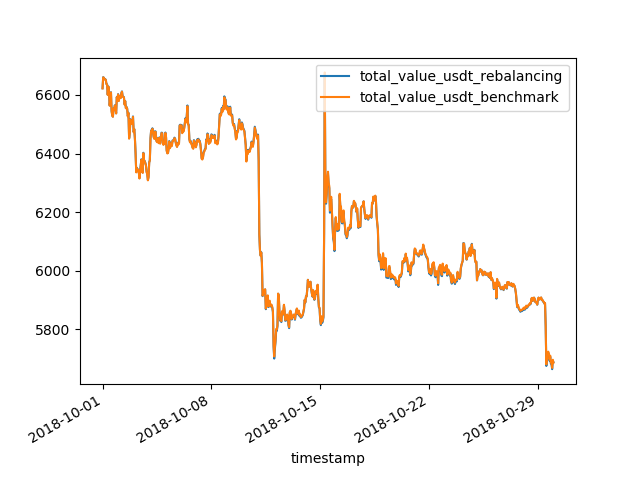

In [9]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_usdt_rebalancing', 'total_value_usdt_benchmark']].plot()

In [10]:
pd.set_option('display.max_rows', 1000)
backtester.get_rebalancing_vs_benchmark_dataframe()

BTC_amount BTC_asset  BTC_portion  BTC_timestamp  \
timestamp                                                               
2018-10-01 00:00:00    0.333333       BTC     0.333333     1538352000   
2018-10-01 01:00:00    0.333753       BTC     0.333333     1538355600   
2018-10-01 02:00:00    0.334295       BTC     0.333333     1538359200   
2018-10-01 03:00:00    0.333840       BTC     0.333333     1538362800   
2018-10-01 04:00:00    0.333694       BTC     0.333333     1538366400   
2018-10-01 05:00:00    0.333868       BTC     0.333333     1538370000   
2018-10-01 06:00:00    0.333703       BTC     0.333333     1538373600   
2018-10-01 07:00:00    0.333253       BTC     0.333333     1538377200   
2018-10-01 08:00:00    0.332983       BTC     0.333333     1538380800   
2018-10-01 09:00:00    0.333008       BTC     0.333333     1538384400   
2018-10-01 10:00:00    0.332786       BTC     0.333333     1538388000   
2018-10-01 11:00:00    0.332161       BTC     0.333333     1538391600   
2018-10-01 12:00:00    0.332620       BTC     0.333333     1538395200   
2018-10-01 13:00:00    0.333520       BTC     0.333333     1538398800   
2018-10-01 14:00:00    0.332152       BTC     0.333333     1538402400   
2018-10-01 15:00:00    0.331545       BTC     0.333333     1538406000   
2018-10-01 16:00:00    0.331228       BTC     0.333333     1538409600   
2018-10-01 17:00:00    0.331554       BTC     0.333333     1538413200   
2018-10-01 18:00:00    0.331436       BTC     0.333333     1538416800   
2018-10-01 19:00:00    0.331794       BTC     0.333333     1538420400   
2018-10-01 20:00:00    0.331762       BTC     0.333333     1538424000   
2018-10-01 21:00:00    0.330995       BTC     0.333333     1538427600   
2018-10-01 22:00:00    0.332952       BTC     0.333333     1538431200   
2018-10-01 23:00:00    0.332593       BTC     0.333333     1538434800   
2018-10-02 00:00:00    0.332989       BTC     0.333333     1538438400   
2018-10-02 01:00:00    0.332738       BTC     0.333333     1538442000   
2018-10-02 02:00:00    0.332316       BTC     0.333333     1538445600   
2018-10-02 03:00:00    0.332124       BTC     0.333333     1538449200   
2018-10-02 04:00:00    0.332517       BTC     0.333333     1538452800   
2018-10-02 05:00:00    0.332838       BTC     0.333333     1538456400   
2018-10-02 06:00:00    0.332956       BTC     0.333333     1538460000   
2018-10-02 07:00:00    0.332873       BTC     0.333333     1538463600   
2018-10-02 08:00:00    0.332908       BTC     0.333333     1538467200   
2018-10-02 09:00:00    0.332661       BTC     0.333333     1538470800   
2018-10-02 10:00:00    0.332642       BTC     0.333333     1538474400   
2018-10-02 11:00:00    0.332644       BTC     0.333333     1538478000   
2018-10-02 12:00:00    0.332279       BTC     0.333333     1538481600   
2018-10-02 13:00:00    0.332294       BTC     0.333333     1538485200   
2018-10-02 14:00:00    0.332145       BTC     0.333333     1538488800   
2018-10-02 15:00:00    0.332339       BTC     0.333333     1538492400   
2018-10-02 16:00:00    0.332198       BTC     0.333333     1538496000   
2018-10-02 17:00:00    0.328854       BTC     0.333333     1538499600   
2018-10-02 18:00:00    0.329911       BTC     0.333333     1538503200   
2018-10-02 19:00:00    0.330712       BTC     0.333333     1538506800   
2018-10-02 20:00:00    0.330075       BTC     0.333333     1538510400   
2018-10-02 21:00:00    0.330522       BTC     0.333333     1538514000   
2018-10-02 22:00:00    0.330004       BTC     0.333333     1538517600   
2018-10-02 23:00:00    0.330741       BTC     0.333333     1538521200   
2018-10-03 00:00:00    0.329838       BTC     0.333333     1538524800   
2018-10-03 01:00:00    0.330232       BTC     0.333333     1538528400   
2018-10-03 02:00:00    0.329704       BTC     0.333333     1538532000   
2018-10-03 03:00:00    0.328362       BTC     0.333333     1538535600   
2018-10-03 04:00:00    0.326618       BTC     0.333333     1538539200   
2018-1

<IPython.core.display.Javascript object>


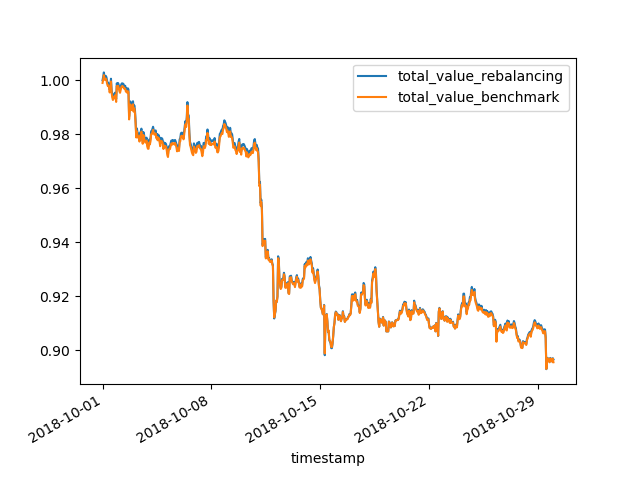

In [11]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing', 'total_value_benchmark']].plot()

<IPython.core.display.Javascript object>


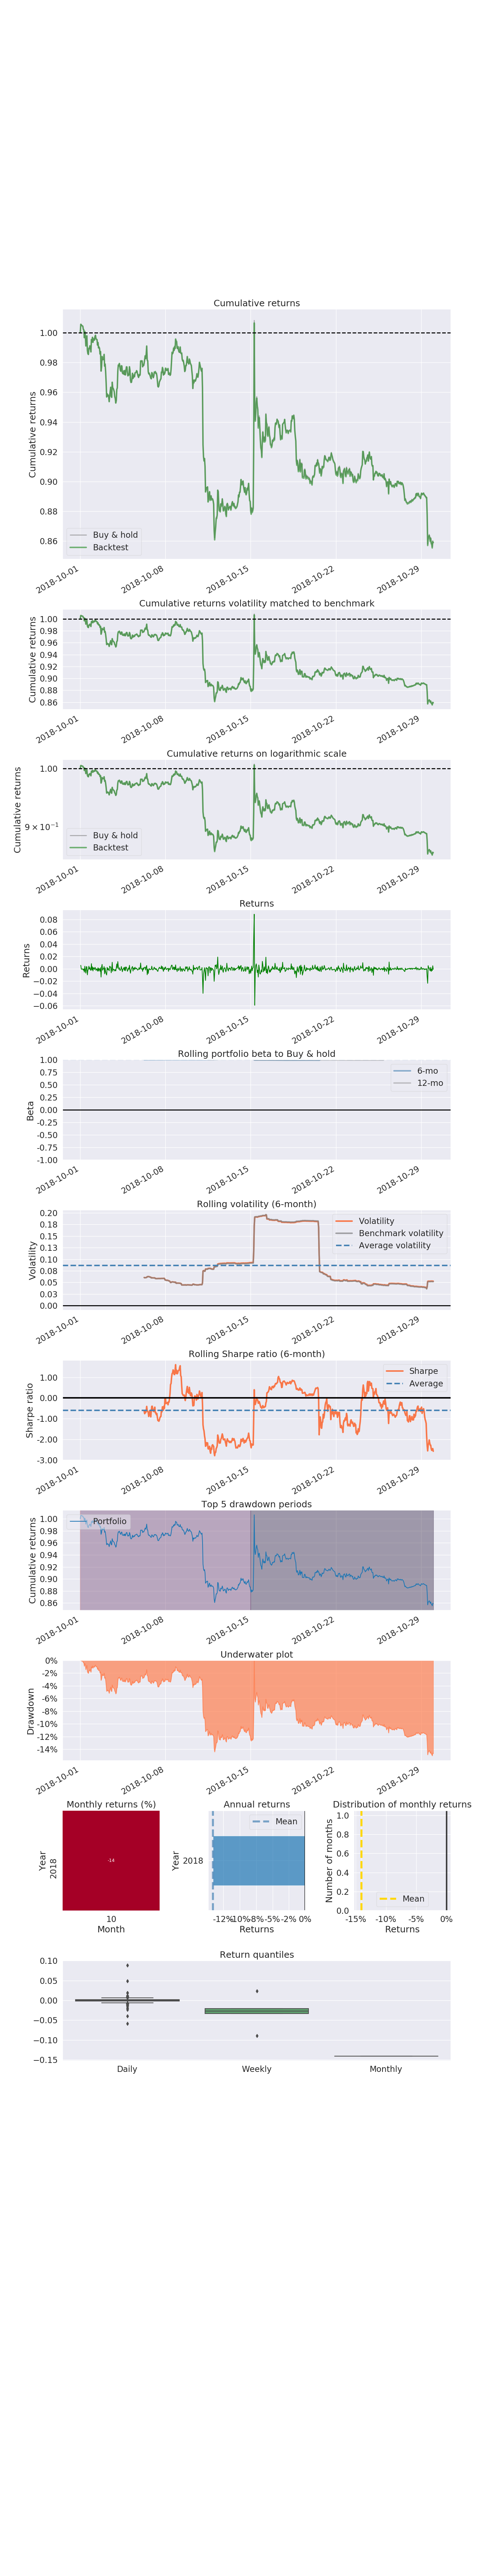

<IPython.core.display.Javascript object>


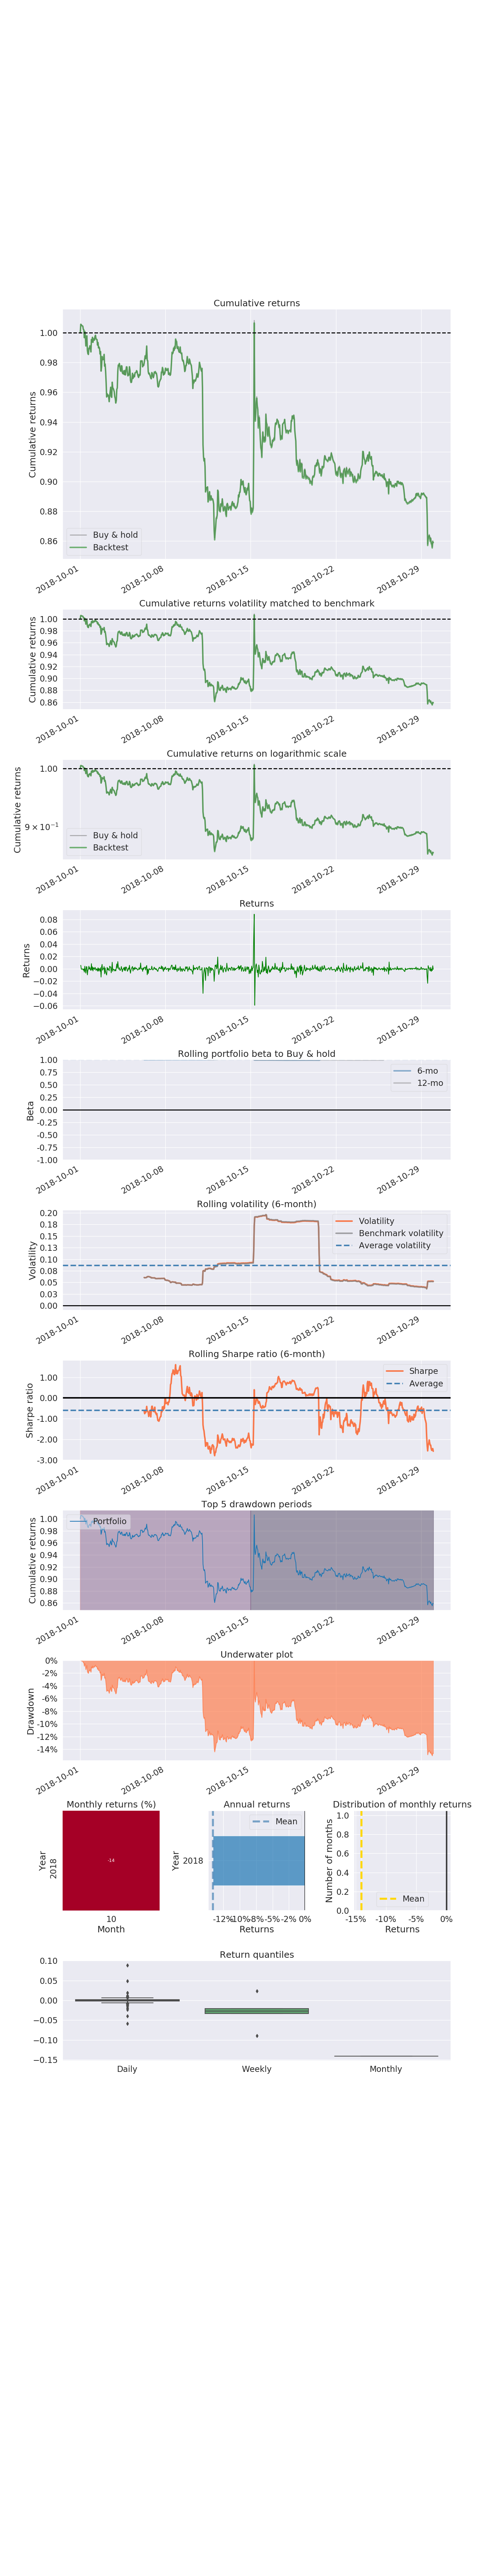

In [12]:
backtester.draw_returns_tear_sheet()